# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This is just generating data
n = 200
x1 = np.random.sample(n)*20
x2 = np.random.sample(n)*20 #-3*x1 
x3 = np.random.sample(n)*20

X = (x1,x2,x3)
a = np.random.sample(n)*20 + 50

B = (3.5,-1.5,.005)
b1,b2,b3 = B
y = b1*x1 + b2*x2 + b3*x3 + a

# We don't add the random error to our dataset because in real life it is unknown
df = pd.DataFrame({'feature1':x1,'feature2':x2,'feature3':x3})

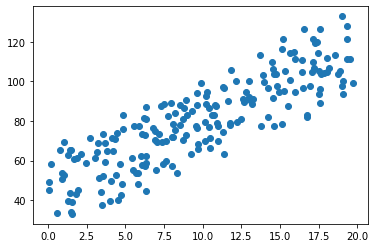

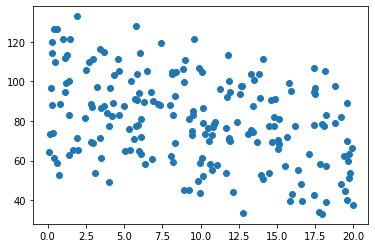

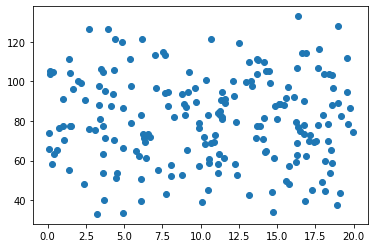

(200, 4)


,feature1,feature2,feature3,target
0,8.000651,15.626874,10.191785,72.121069
1,14.927262,11.954087,7.878541,94.888621
2,8.525672,7.321410,3.326903,88.115408
3,17.357420,0.277087,4.849727,119.986368
4,10.147423,11.941918,17.066094,69.639969


In [3]:
# Having a look at the data

df['target'] = y

# fig, ax = plt.subplots()
for x in X:
    plt.figure()
    plt.scatter(x,y)
    plt.show()

print(df.shape)
df.head()

In [4]:
# Pre-processing
X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True,
                             normalize=False,
                             n_jobs=-1
                            )

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_B = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(B,est_B.round(4)))

R2 = 0.93
constant: 61.0939
coeficients: real (3.5, -1.5, 0.005) vs [ 3.5516 -1.6445  0.0052] estimated


### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [6]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.93
const       61.0939
feature1     3.5516
feature2    -1.6445
feature3     0.0052
dtype: float64


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Statsmodels superpower

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     833.0
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          3.02e-111
Time:                        09:18:36   Log-Likelihood:                -641.19
No. Observations:                 200   AIC:                             1290.
Df Residuals:                     196   BIC:                             1304.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0939      1.413     43.223      0.000      58.306      63.881
feature1       3.5516      0.078     45.743      0.000       3.399       3.705
feature2      -1.6445      0.073    -22.553      0.000      -1.788      -1.501
feature3       0.0052      0.074      0.070      0.944      -0.141       0.151
==============================================================================
Omnibus:                       90.309   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.946
Skew:                          -0.027   Prob(JB):                      0.00255
Kurtosis:                       1.804   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinearity exploration

In [8]:
X.corr()

,const,feature1,feature2,feature3
const,NaN,NaN,NaN,NaN
feature1,NaN,1.000000,0.061791,-0.082014
feature2,NaN,0.061791,1.000000,-0.101483
feature3,NaN,-0.082014,-0.101483,1.000000


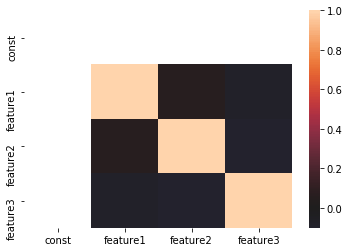

In [9]:
import seaborn as sns
sns.heatmap(X.corr(), center=0)